# Probability 101 for Astronomers

"Astronomy, like any experimental subject, needs statistical methods to interpret data reliably" <i> Practical Statistics for Astronomers.</i>

Over the next two days, we will review and introduce you to different concepts related to probabilities, random numbers and sampling problems, as well as statistical data analyses (both frequestist and bayesian methods).

## Short review of probability theory:

What is a probability? Probabilities are numbers that tell us how often things happen (frequentist), or they inform us on our beliefs (Bayesian) in a different outcome or notion. A probability is a real number running from 0 -> 1, and how these probabilities relate to specific events within a geometry that interests us is called the <b>probability space</b>. The function which then takes an event, and then provides us with the probability of the occurance of the event is called the <b>probability distribution</b>.

There are a few basic rules that form the basis for all probabilistic methodology. In this lecture, we just brieﬂy review these rules. This will not be an in depth introduction into probability theory. 

We excerpt the below from [Shalizi](http://vserver1.cscs.lsa.umich.edu/~crshalizi/prob-notes/), which is a good short introduction to the fundamentals in the hand-waving style of a physicist:

If $X$ and $Y$ are two events and $p(X)$ is the probability of the event $X$ to happen. $X^ ̄$ is the complement of $X$, the event which is all the occurrences which are not in $X$. $X+Y$ is the union of $X$ and $Y$; $X,Y$ is the intersection of $X$ and $Y$. (Both $X+Y$ and $X,Y$ are also events.)

### The very fundamental rules of probability:

1. p(X) = 1 : X has to happen
2. p(X) = 0 : X will certainly not happen
3. 0 ≤ p(X) ≤ 1 : X has probability range from low to high
4. p(X)+p(X ̄)=1 : X must either happen or not-happen
5. p(X+Y)=p(X)+p(Y)−p(X,Y) X can happen and Y can happen but we must subtract the cases that are happening together so we do not overcount.

For two random variates $x,y$ the $p(x,y)$ is called the joint distribution, and $p(x|y)$ the conditional distribution. 


## Random Variates & Probability Distributions: $P(x)$

Let's take some simple data, X, and look at their distribution, and derive their probabilities (P(X))

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter

In [33]:
df=pd.read_csv("../data/01_heights_weights_genders.csv") ## Data from "Machine Learning for Hackers"
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


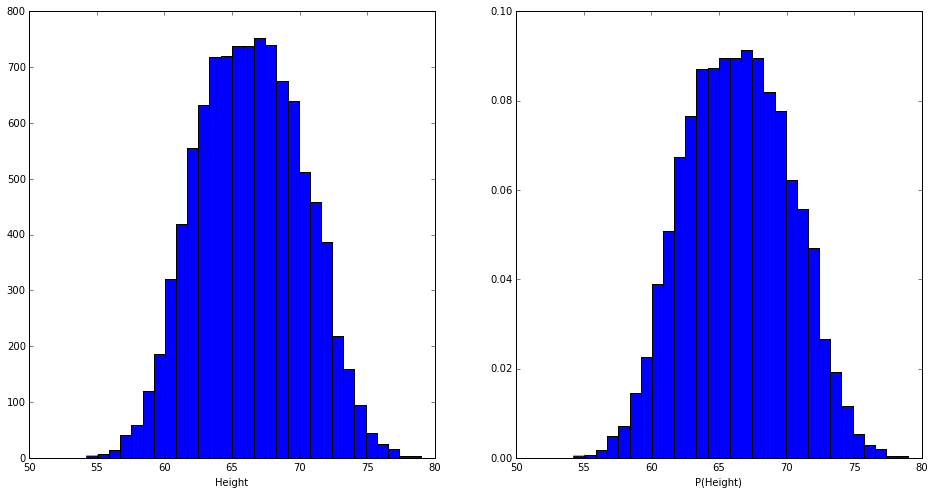

In [34]:
## Define the X variable from the datafile
x=df['Height']

plt.figure(1,figsize=(16,8))
plt.subplot(121) ## [row, column, fignum]
plt.hist(x,bins=30)
plt.xlabel('Height')

plt.subplot(122)
plt.hist(x, normed=1,bins=30)
plt.xlabel('P(Height)')
plt.show()


## The joint distribution: $P(x,y)$

Now, let's take this a step further and assume we have two random variables, X, Y, and these are defined on some linked probability space, this is known as the <b>joint distribution</b> for X and Y. In this case, we will take X=height and Y=weight.

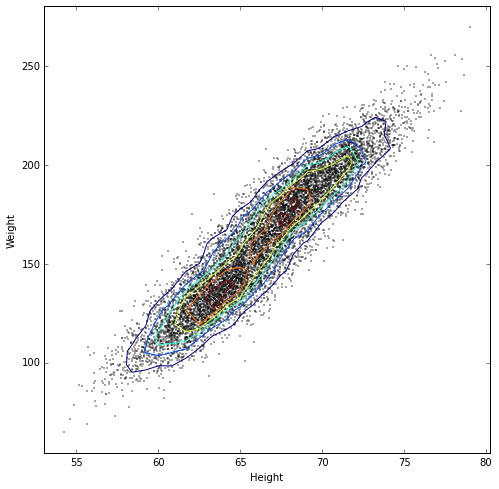

In [35]:
## Define the x,y variables from the datafile
x=df['Height']
y=df['Weight']

## Build a 2-D Histogram of the variables -- the Joint Distribution
H, yedges, xedges = np.histogram2d(y, x, bins=30)

## Plot the contours and the x,y variables
figure=plt.figure(figsize=(8,8))
plt.contour(xedges[0:-1], yedges[0:-1], H)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x,y,c='white',s=0.2)
plt.show()

## The Conditional & Marginal Distribution

The conditional distribution is defined as:

$$p(x | y) = \frac{p(x,y)}{p(y)}$$

With this in mind, we can define the marginal probability, $p(x)$, which you can think of as a conditional probability, $p(x | y)$, averaged over all possibilities of y. i.e., it is the sum over the joint distribution of x and y where we sum over all possibilities of y,

$$p(x) = \sum_y p(x,y) $$

for continuous random variables this becomes:

$$ p(x) = \int_y p(x,y) \, dy $$

A little more intuitively, let's go back to our height and weight example:

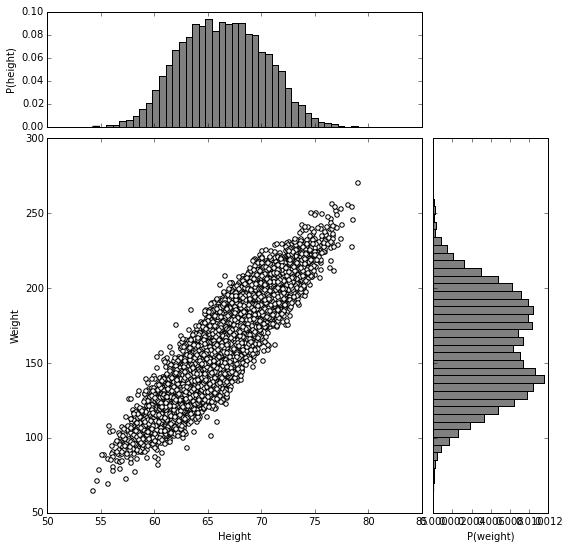

In [86]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

figure=plt.figure(figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())

axScatter.scatter(x,y, c='white')
axScatter.set_xlabel('Height')
axScatter.set_ylabel('Weight')

axHistx.hist(x, bins=40, normed=1, color='gray')
axHisty.hist(y, bins=40, normed=1, orientation='horizontal', color='gray')

axHistx.set_xlim( axScatter.get_xlim() )
axHistx.set_ylabel('P(height)')
axHisty.set_ylim( axScatter.get_ylim() )
axHisty.set_xlabel('P(weight)')


In [87]:
dfsub = df[(68.9 < df.Height) & (df.Height < 69.1)]
dfsub.describe()

,Height,Weight
count,185.000000,185.000000
mean,68.996424,184.233805
std,0.056562,11.700128
min,68.900899,152.430938
25%,68.949858,176.867604
50%,68.996145,184.435174
75%,69.044211,192.513165
max,69.099768,213.143154


### Independence
Two variables are said to be independent if their joint distribution factorizes into a product of two marginal probabilities:

$$ p(x,y) = p(x) \, p(y) $$ 

Note that if two variables are uncorrelated, that does not mean they are statistically independent. There are many ways to measure statistical association between variables and correlation is just one of them. However, if two variables are independent, this will ensure there is no correlation between them. Another consequence of independence is that if $x$ and $y$ are independent, the conditional probability of $x$ given $y$ is just the probability of $x$:

$$ p(x|y) = p(x) $$

In other words, by conditioning on a particular $y$, we have learned nothing about $x$ because of independence. Two variables $x$ and $y$ and said to be conditionally independent of $z$ if the following holds:

$$ p(x,y|z) = p(x|z) p(y|z) $$

Therefore, if we learn about z, x and y become independent. Another way to write that $x$ and $y$ are conditionally independent of $z$ is 

$$ p(x| z, y) = p(x|z) $$

In other words, if we condition on $z$, and now also learn about $y$, this is not going to change the probability of $x$. It is important to realize that conditional independence between $x$ and $y$ does not imply independence between $x$ and $y$. 

So, can we take a look of independence on conditionality on our data. There is another random variate, $G$, that we can introduce into the plots, namely the Gender column.

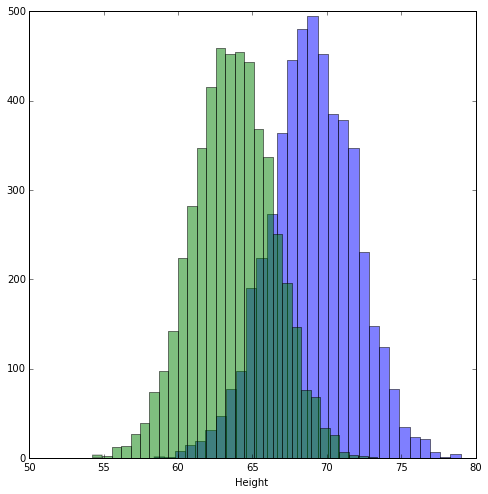

In [134]:
gender=df['Gender']
figure=plt.figure(figsize=(8,8))

foo=x[gender == 'Male']
plt.hist(foo.values,bins=30,alpha=0.5)
foo=x[gender == 'Female']
plt.hist(foo.values,bins=30,alpha=0.5)
plt.xlabel('Height')
plt.show()

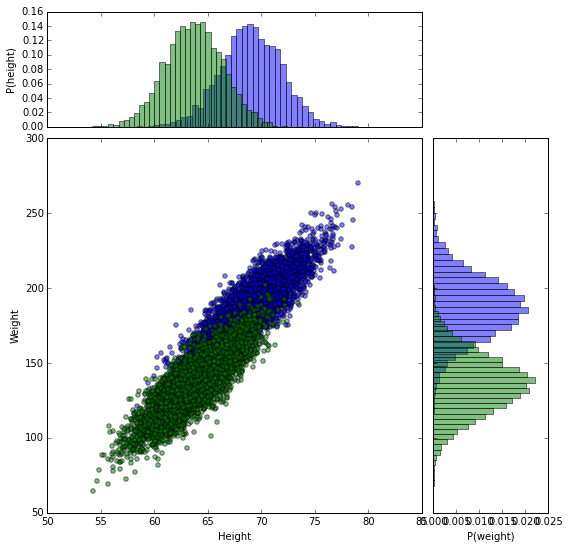

In [137]:
gender=df['Gender'] ## define an index based on gender

figure=plt.figure(figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())

axScatter.scatter(x[gender == 'Male'], y[gender == 'Male'], alpha=0.5, c='blue')
axScatter.scatter(x[gender == 'Female'], y[gender == 'Female'], alpha=0.5, c='green')
axScatter.set_xlabel('Height')
axScatter.set_ylabel('Weight')

fooxm=x[gender == 'Male']
fooxf=x[gender == 'Female']
fooym=y[gender == 'Male']
fooyf=y[gender == 'Female']

axHistx.hist(fooxm.values, bins=40, alpha=0.5, normed=1)
axHistx.hist(fooxf.values, bins=40, alpha=0.5, normed=1)
axHisty.hist(fooym.values, bins=40, orientation='horizontal', alpha=0.5, normed=1)
axHisty.hist(fooyf.values, bins=40, orientation='horizontal', alpha=0.5, normed=1)

axHistx.set_xlim( axScatter.get_xlim() )
axHistx.set_ylabel('P(height)')
axHisty.set_ylim( axScatter.get_ylim() )
axHisty.set_xlabel('P(weight)')

###Product rule
We can rewrite a joint distribution as a product of a conditional and marginal probability,

$$ p(x,y) = p(x|y) p(y) $$

###Chain rule
The product rule is applied repeatedly to give expressions for the joint
probability involving more than two variables. For example, the joint distribution over three
variables can be factorized into a product of conditional probabilities:

$$ p(x,y,z) = p(x|y,z) \, p(y,z) = p(x |y,z) \, p(y|z) p(z) $$


These probability rules and relations will become really useful later on when you are introduced to likelihood construction and Bayesian analyses.

# Distributions 

The <b>Probability distribution</b> is a function that takes an event and provides its probability. There are two classes of probability distributions, discete and continous.

## Important Discrete Distributions

Sometimes a particular event has a finite value. For example, take a coin that you flip, the outcome is simple, heads or tails. It's not a continuous value, i.e., you can't get XX% of a head. It's a binary value 1 or 0. Count or no count.

There are a plethora of statistical distributions that deal with discrete values. Here we are going to explore just 3 (well-used) ones.

### The Bernoulli Distribution

You will have undoubtedly have come across the Bernoulli distribution. This is the most simple of event outcomes. The binary yes/no switch. Every exeriment, can be always expressed in terms of success/failure. If you do not know which distributon to use, you can think of any problem as a yes/no problem and starting from there you can work your way to all other distributions.

For a given probability $p$ of a success/failure (or yes/no), the we expect the value k=1, $p n$ times out of $n$, meanwhile it takes k=0 in all the other cases. For example if $p=0.6$ and we draw 10 numbers, then the expectation is that 6 will be 1 and 4 will be zero. Therefore the probability of getting $k=1$ is $p$ and $k=0$ is $1-p$. 

$$ f(k;p) = \begin{cases} p & \text{if }k=1, \\[6pt]
1-p & \text {if }k=0.\end{cases} $$

This can be expressed also as:

$$ f(k;p) = p^k (1-p)^{1-k}\!\quad \text{for }k\in\{0,1\}.$$

The mean of random variables drawn from such distribution is $E[X] = p$ and the variance is $Var[X]=p(1-p)$

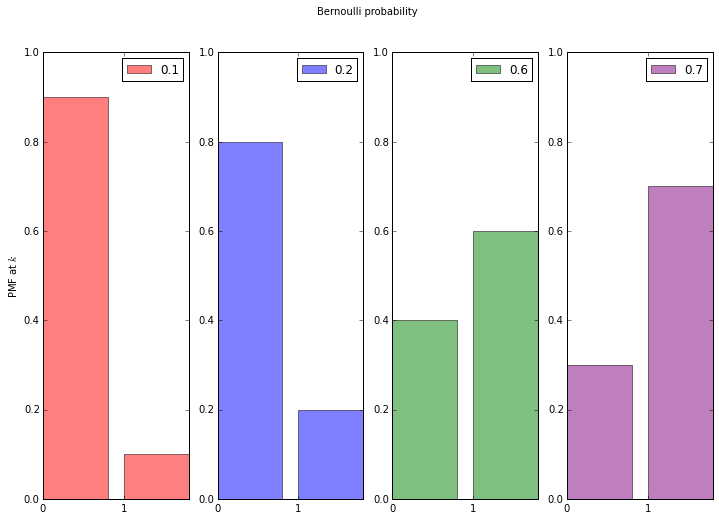

In [155]:
import scipy as sp
from scipy.stats import bernoulli

plt.figure(figsize=(12,8))
colors = ['red','blue','green','purple']
a = np.arange(2)

for i, p in enumerate([0.1, 0.2, 0.6, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, p), label=p, color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(a)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PMF at $k$")
    

q=plt.suptitle("Bernoulli probability mass functions (PMF)")

#### How to draw from the Bernoulli distribution

We use ".rvs" in the scipy module. It's as simple as that.

In [156]:
## Returns 100 random variates drawn from the Bernoulli distribution with p=0.6 
a=bernoulli.rvs(0.6, size=100)

print a
print "Expectation = ",np.sum(a)/float(len(a))

[1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0]
Expectation =  0.67


Why is the expectation not exactly equal to 0.6 when we asked that our variates be drawn from the distribution where p=0.6? There is of course a "randomness" to whether we actually pick a 1 or a 0. Hence there is an uncertainty (or error) associated with the expectation from the specific draws, clearly this must depend on the number of variates drawn from the distribution.

Now, write your own little bit of code to assess the E(X) value as a function of number of drawn random variates.

In [ ]:
## Write your own code here...







### The Binomial Distribution

The Bionomial is the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. The Binomial is closely related to the Bernoulli, given that the Binomial is simply Bernoulli's generalized version, where n=1 in the special case of the Bernoulli.

$$P(X = k; n, p) = {n\choose k}p^k(1-p)^{n-k} $$

where

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

for $k$ in {0, 1, 2, ... , n}


The expected value $E[X]=np$ and the variance is $Var[X]=np(1-p)$

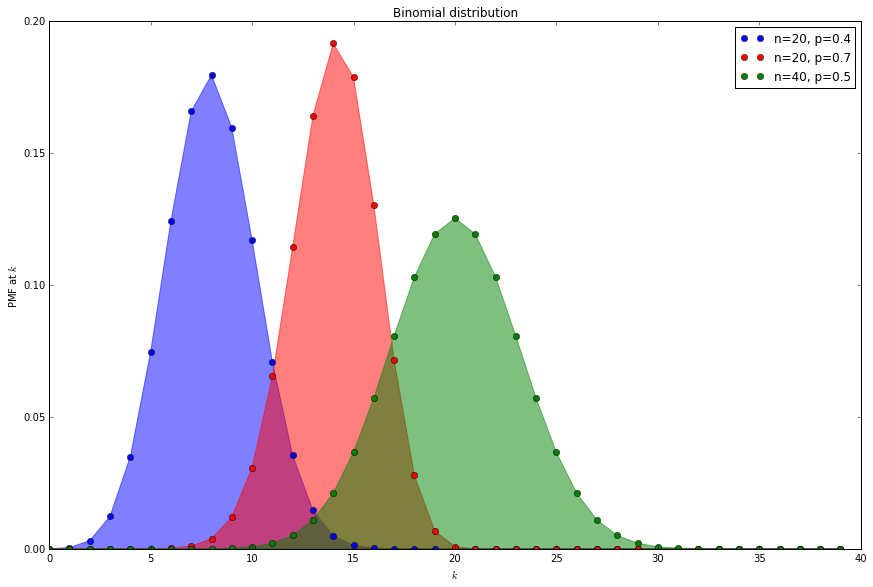

In [190]:
from scipy.stats import binom

k = np.arange(0, 40)

plt.figure(figsize=(12,8))

n, p = 20, 0.4
plt.plot(k, binom.pmf(k, n, p), 'o', c='blue', label='n=20, p=0.4')
plt.fill_between(k, binom.pmf(k, n, p), color='blue', alpha=0.5)

n, p = 20, 0.7
plt.plot(k, binom.pmf(k, n, p), 'o', c='red', label='n=20, p=0.7')
plt.fill_between(k, binom.pmf(k, n, p), color='red', alpha=0.5)

n, p = 40, 0.5
plt.plot(k, binom.pmf(k, n, p), 'o', c='green', label='n=40, p=0.5')
plt.fill_between(k, binom.pmf(k, n, p), color='green', alpha=0.5)

plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PMF at $k$")
q=plt.xlabel("$k$")
plt.show()


Now, use the above code snippet to write your own to overlay the histograms for 100 random variates drawn for each of the distributions.

In [ ]:
## Write your own code here...








### Poisson Distribution

The Poisson distribution is the go-to for counting-statistics. It expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate ($\lambda$) and independently of the time since the last event.  Defined as,


$$ P(X=k)= \frac{\lambda^k e^{-\lambda}}{k!}, $$

for all $k \ge 0$, $\lambda > 0$

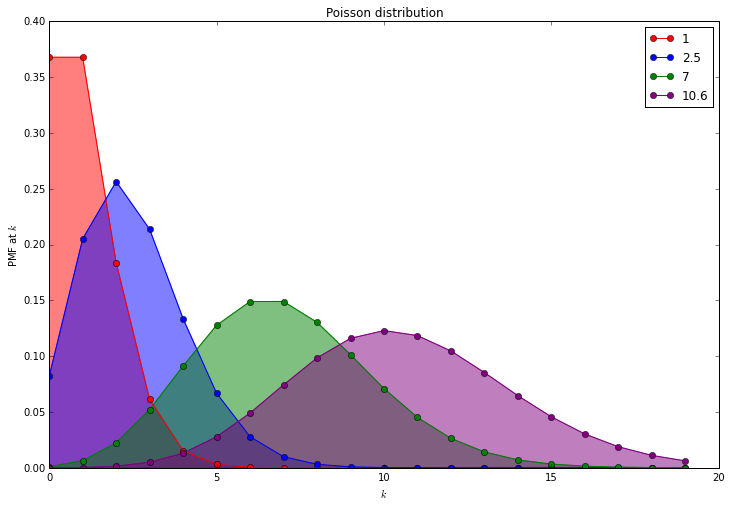

In [195]:
k = np.arange(20)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2.5, 7, 10.6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PMF at $k$")
plt.xlabel("$k$")
plt.show()

## Important Continous Distributions

The difficulty with continuous random variables is that you can’t find the probability of the exact event. The problem is  that every value of the random variate has length 0, but if you add enough values together you have something with positive length. The usual way around this difficulty, is to define probabilities for intervals.

Unlike discrete variables, continuous variables are not defined by Probability Mass Functions, but instead by Probability Density Functions (pdf), can you think why?

### Exponential Distribution

The Exponential is the probability distribution that describes the time between events in a Poisson process
The Exponential probability function is
$$p(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$
Therefore, the random variable X has an exponential distribution with parameter $\lambda$, we say $X$ is exponential and write
$ X∼Exp(\lambda)$
Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:
$E[X|\lambda]=\frac{1}{\lambda}$

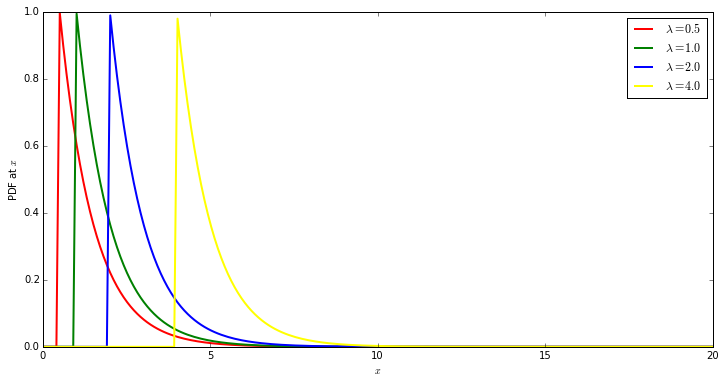

In [38]:
from scipy.stats import expon

x = np.linspace(0,20, num=200)

colors=['red','green','blue','yellow']
lambdas=[0.5, 1, 2, 4]

fig = plt.figure(figsize=(12,6))
for lam, c in zip(lambdas, colors):
    plt.plot(x, expon.pdf(x, lam), lw=2, 
             c=c, label = r"$\lambda = {0:.1f}$".format(lam))
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.show()

### Normal Distribution

Probably the most important of all distributions is the normal distribution due to the Central Limit Theorem which
states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed. A normal distribution is:

$$ p(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

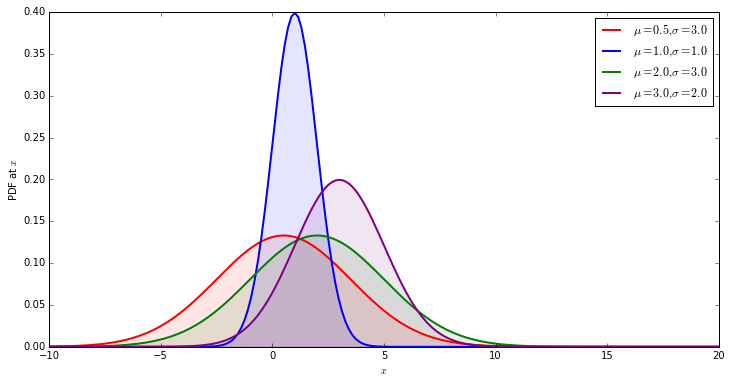

In [197]:
from scipy.stats import norm

x = np.linspace(-10,20, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5, 1, 2, 3, 4], [3, 1, 3, 2, 5], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.show()

This time write your own code to drawn some random variates, say with sample size n=10, 100, 1000 and 10000, for a $\mu = 1$, $\sigma 1$ gaussian distribution. Exploit these RVs to make them "match" a $\mu = 2.5$, $\sigma = 3$ gaussian PDF. How well do you do at recovering the distribution?

In [199]:
## Write your code here...









## The $\chi^2$ Distribution

In probability theory and statistics, the chi-squared distribution with $k$ degrees of freedom is the distribution of a sum of the squares of $k$ independent standard normal random variables. It is a special case of the $\Gamma$ distribution and is one of the most widely used probability distributions in inferential statistics, e.g., in hypothesis testing or in the construction of confidence intervals. It is defined as:

$$p(x) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 -1} e^{-x/2}$$ for k degrees of freedom, where

$$\Gamma(t) = \int^{\infty}_0 x^{t−1} e^{−x}dx. $$

Gamma has the nice property that $\Gamma(t + 1) = t\Gamma(t)$, and for integer $t$, $\Gamma(t) = (t − 1)!$. Since $k$ is an integer, the only then we need to compute for our purposes is that $\Gamma(1/2) = \sqrt{\pi}$.

Luckily for us, scipy has a built function for $\chi^2$ so we don't need to compute nested distributions (there is also a $\Gamma$ distribution in scipy if you want to play).

In [24]:
from scipy.stats import chi2

Aside: for now, we are not going to discuss "degrees of freedom", this will make infinitely more sense when we look at fitting routines and hypothesis testing later.

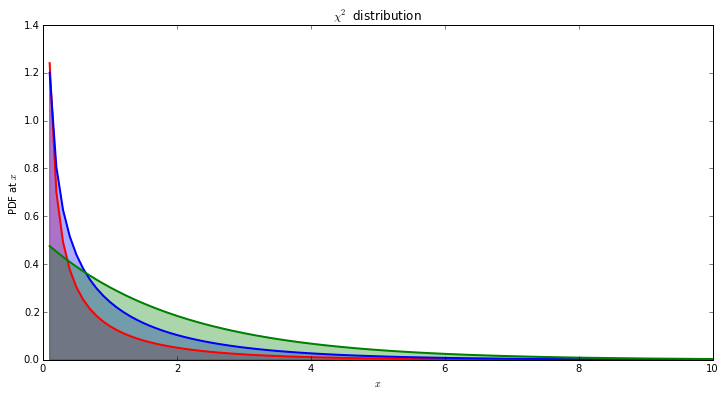

In [32]:
x = np.linspace(0.1, 10, 100)
ks = [0.5, 1, 2, 50]
colors=['red','blue','green']

plt.figure(figsize=(12,6))

for a,c in zip(ks,colors):
    label=r"$k$ = {0:.1f}".format(a)
    plt.plot(x, chi2.pdf(x, a), lw=2, color=c)
    plt.fill_between(x, chi2.pdf(x, a), color=c, alpha = .33)

plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("$\chi^2$ distribution")
plt.show()